In [2]:
import numpy as np
import pandas as pd

In [4]:
heart = pd.read_csv('Heart data.csv')

In [6]:
heart

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.0,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1
593,43,1,4,140.0,288.0,0.0,0.0,135.0,1.0,2.0,2.0,NaN,NaN,1
594,41,1,4,120.0,336.0,0.0,0.0,118.0,1.0,3.0,2.0,NaN,NaN,1
595,44,1,4,135.0,491.0,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1


In [8]:
heart.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             1
cholestoral               23
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

<h2>1.1. Outlier detection</h2>
<p>Visialisation</p>

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

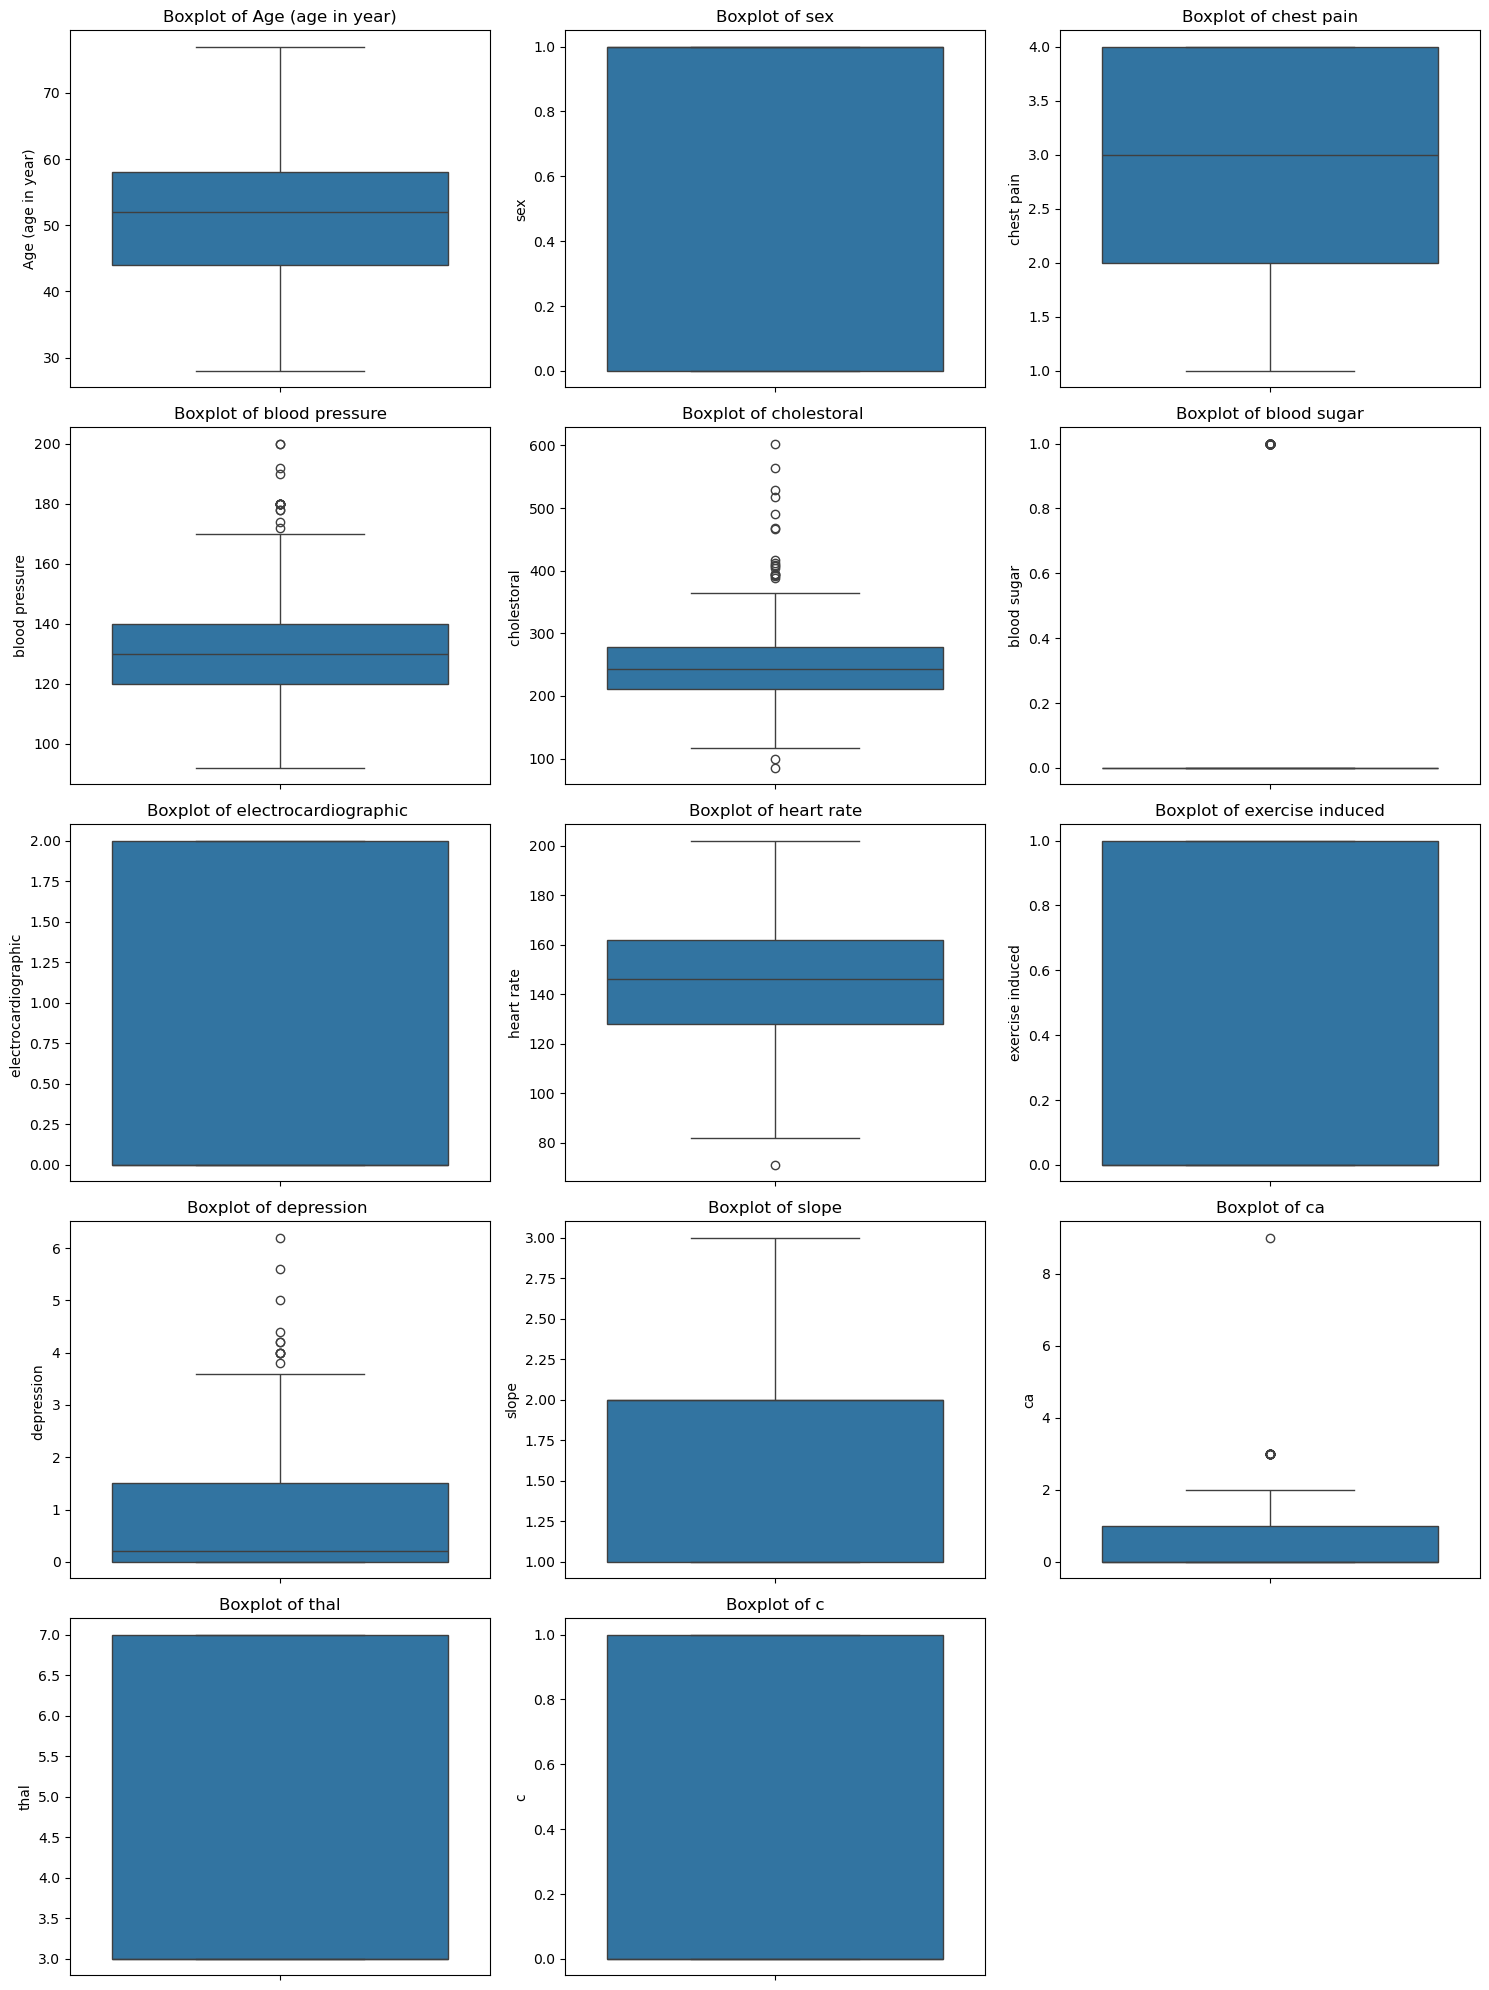

In [12]:
# Only keep numeric columns for boxplots
# include only numeric columns" (like int64, float64, etc.)
numeric_cols = heart.select_dtypes(include=['number']).columns

# Set up the subplot grid
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 5, n_rows * 4))

# Loop through columns and plot
for idx, column_name in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=heart[column_name])
    plt.title(f'Boxplot of {column_name}')
plt.tight_layout()

plt.show()


In [13]:
# Based on the figures, blood pressur, cholestoral, depression contains some outliers. also heart rate and ca have a few outliers.

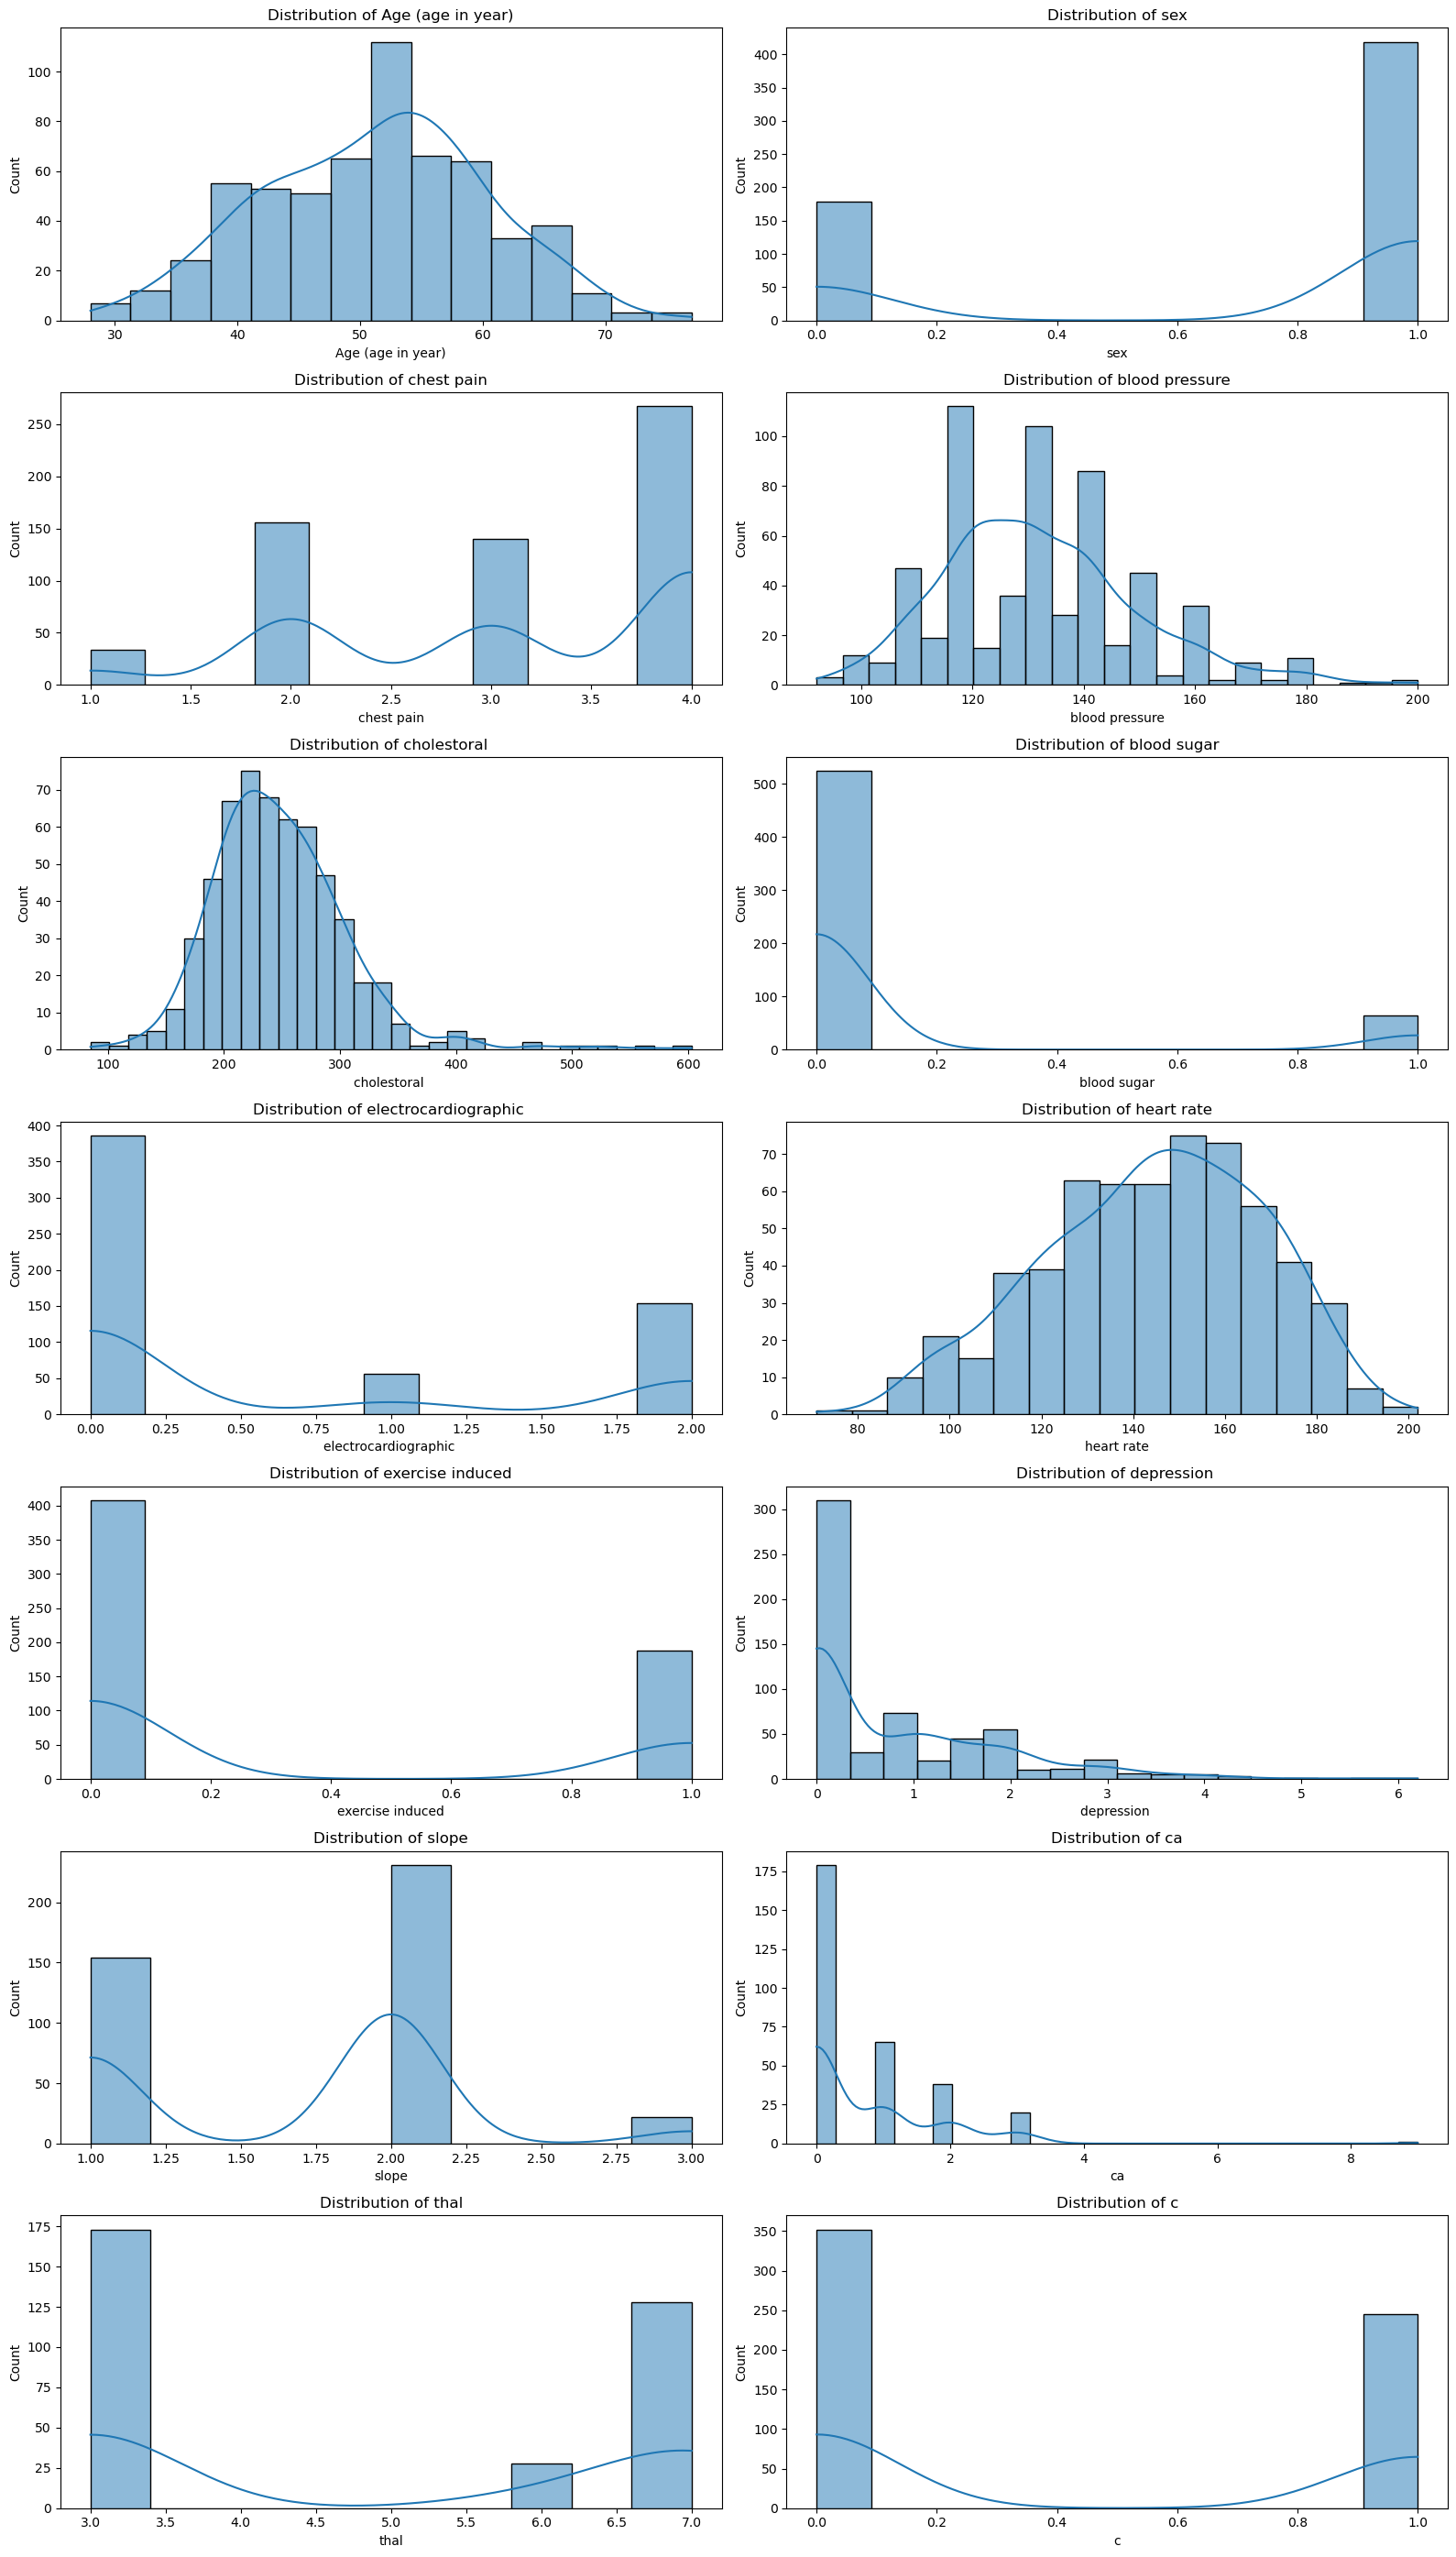

In [14]:

# Only keep numeric columns
numeric_cols = heart.select_dtypes(include=['number']).columns

# Set up subplot grid
n_cols = 2
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols
plt.figure(figsize=(n_cols * 8, n_rows * 4))

# Loop and plot using histplot
for idx, column_name in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.histplot(heart[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')

plt.tight_layout()
plt.show()


<p>statistics</p>

In [16]:
q1 = heart['depression '].quantile(.25)
q3 = heart['depression '].quantile(.75)
IQR = q3 - q1
heart[(heart['depression ']> q3 + 1.5*IQR)|(heart['depression '] < q1 - 1.5*IQR)]

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
101,59,1,1,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0.0,7.0,0
478,63,1,4,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,1
514,62,0,4,160.0,164.0,0.0,2.0,145.0,0.0,6.2,3.0,3.0,7.0,1
520,55,1,4,140.0,217.0,0.0,0.0,111.0,1.0,5.6,3.0,0.0,7.0,1
521,56,0,4,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,1
527,51,1,4,140.0,298.0,0.0,0.0,122.0,1.0,4.2,2.0,3.0,7.0,1
549,52,1,4,160.0,246.0,0.0,1.0,82.0,1.0,4.0,2.0,NaN,NaN,1
573,63,0,4,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,1
579,38,1,1,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,1
581,58,1,4,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,1


In [18]:
outliers_dict = {}

for col in heart.select_dtypes(include='number').columns:
    q1 = heart[col].quantile(0.25)
    q3 = heart[col].quantile(0.75)
    IQR = q3 - q1
    outliers = heart[(heart[col] < q1 - 1.5 * IQR) | (heart[col] > q3 + 1.5 * IQR)]
    outliers_dict[col] = outliers.index.tolist()
outliers_dict

{'Age (age in year)': [],
 'sex': [],
 'chest pain': [],
 'blood pressure': [8,
  101,
  110,
  234,
  283,
  336,
  337,
  338,
  383,
  387,
  465,
  499,
  513,
  521,
  532,
  561,
  585],
 'cholestoral ': [28,
  85,
  96,
  183,
  210,
  215,
  227,
  324,
  421,
  460,
  483,
  488,
  491,
  545,
  553,
  560,
  573,
  585,
  595],
 'blood sugar': [0,
  8,
  14,
  23,
  26,
  28,
  29,
  36,
  60,
  64,
  76,
  78,
  83,
  87,
  90,
  93,
  97,
  99,
  103,
  106,
  111,
  136,
  137,
  189,
  198,
  226,
  230,
  236,
  246,
  308,
  353,
  373,
  374,
  388,
  413,
  425,
  434,
  446,
  447,
  456,
  463,
  466,
  471,
  472,
  476,
  479,
  484,
  491,
  493,
  501,
  511,
  513,
  518,
  519,
  521,
  532,
  537,
  539,
  551,
  552,
  557,
  558,
  563,
  575,
  589],
 'electrocardiographic ': [],
 'heart rate': [468],
 'exercise induced': [],
 'depression ': [101, 478, 514, 520, 521, 527, 549, 573, 579, 581, 591],
 'slope': [],
 'ca': [52,
  97,
  99,
  190,
  363,
  379,


In [19]:
outlier_records = []

for col in heart.select_dtypes(include='number').columns:
    q1 = heart[col].quantile(0.25)
    q3 = heart[col].quantile(0.75)
    IQR = q3 - q1

    # Boolean mask for outliers in the column
    outlier_mask = (heart[col] < q1 - 1.5 * IQR) | (heart[col] > q3 + 1.5 * IQR)
    
    # Get the indices where outliers exist
    outlier_indices = heart[outlier_mask].index
    
    for idx in outlier_indices:
        outlier_records.append({'index': idx, 'column': col, 'value': heart.loc[idx, col]})

outlier_records

[{'index': 8, 'column': 'blood pressure', 'value': 172.0},
 {'index': 101, 'column': 'blood pressure', 'value': 178.0},
 {'index': 110, 'column': 'blood pressure', 'value': 180.0},
 {'index': 234, 'column': 'blood pressure', 'value': 190.0},
 {'index': 283, 'column': 'blood pressure', 'value': 180.0},
 {'index': 336, 'column': 'blood pressure', 'value': 180.0},
 {'index': 337, 'column': 'blood pressure', 'value': 180.0},
 {'index': 338, 'column': 'blood pressure', 'value': 180.0},
 {'index': 383, 'column': 'blood pressure', 'value': 174.0},
 {'index': 387, 'column': 'blood pressure', 'value': 192.0},
 {'index': 465, 'column': 'blood pressure', 'value': 180.0},
 {'index': 499, 'column': 'blood pressure', 'value': 200.0},
 {'index': 513, 'column': 'blood pressure', 'value': 180.0},
 {'index': 521, 'column': 'blood pressure', 'value': 200.0},
 {'index': 532, 'column': 'blood pressure', 'value': 178.0},
 {'index': 561, 'column': 'blood pressure', 'value': 180.0},
 {'index': 585, 'column': 

<p>Z-score - 1</p>

In [23]:
heart[((heart['blood pressure'] - heart['blood pressure'].mean())/heart['blood pressure'].std()).abs()>3]

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
234,39,1,2,190.0,241.0,0.0,0.0,106.0,0.0,0.0,NaN,NaN,NaN,0
387,54,1,2,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1
499,54,1,4,200.0,198.0,0.0,0.0,142.0,1.0,2.0,2.0,NaN,NaN,1
521,56,0,4,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,1


In [24]:
list = []
for i in heart.columns:
    outliers = heart[((heart[i] - heart[i].mean())/heart[i].std()).abs()>3]
    if not outliers.empty:
        list.append({'column name': i, 
                 'outliers': outliers})

In [30]:
list

[{'column name': 'blood pressure',
  'outliers':      Age (age in year)  sex  chest pain  blood pressure  cholestoral   \
  234                 39    1           2           190.0         241.0   
  387                 54    1           2           192.0         283.0   
  499                 54    1           4           200.0         198.0   
  521                 56    0           4           200.0         288.0   
  
       blood sugar  electrocardiographic   heart rate  exercise induced  \
  234          0.0                    0.0       106.0               0.0   
  387          0.0                    2.0       195.0               0.0   
  499          0.0                    0.0       142.0               1.0   
  521          1.0                    2.0       133.0               1.0   
  
       depression   slope   ca  thal  c  
  234          0.0    NaN  NaN   NaN  0  
  387          0.0    1.0  1.0   7.0  1  
  499          2.0    2.0  NaN   NaN  1  
  521          4.0    3.0  2.

In [33]:
print('Skewness:', heart['blood pressure'].skew())

Skewness: 0.7195066225793251


In [35]:
print('Kurtosis:', heart['blood pressure'].kurt())

Kurtosis: 0.8292304104883095


In [37]:
mean = heart['blood pressure'].mean()
std = heart['blood pressure'].std()
lower = mean - 3*std
upper = mean + 3*std

In [45]:
cleaned_heart = heart.copy()  # Keep original, work on a copy

In [47]:

for i in cleaned_heart.columns:
    lower = cleaned_heart[i].mean() - 3 * cleaned_heart[i].std()
    upper = cleaned_heart[i].mean() + 3 * cleaned_heart[i].std()
    cleaned_heart[i] = cleaned_heart[i].apply(lambda x: upper if x > upper else (lower if x < lower else x))
    

In [49]:
cleaned_heart

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,slope,ca,thal,c
0,63,1,1,145.0,233.000000,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37,1,3,130.0,250.000000,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41,0,2,130.0,204.000000,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56,1,2,120.0,236.000000,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57,0,4,120.0,354.000000,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.000000,0.0,0.0,134.0,1.0,2.0,2.0,NaN,NaN,1
593,43,1,4,140.0,288.000000,0.0,0.0,135.0,1.0,2.0,2.0,NaN,NaN,1
594,41,1,4,120.0,336.000000,0.0,0.0,118.0,1.0,3.0,2.0,NaN,NaN,1
595,44,1,4,135.0,428.009466,0.0,0.0,135.0,0.0,0.0,NaN,NaN,NaN,1


In [51]:
outlier_records2 = []

for col in cleaned_heart.select_dtypes(include='number').columns:
    q1 = cleaned_heart[col].quantile(0.25)
    q3 = cleaned_heart[col].quantile(0.75)
    IQR = q3 - q1

    # Boolean mask for outliers in the column
    outlier_mask = (cleaned_heart[col] < q1 - 1.5 * IQR) | (cleaned_heart[col] > q3 + 1.5 * IQR)
    
    # Get the indices where outliers exist
    outlier_indices = cleaned_heart[outlier_mask].index
    
    for idx in outlier_indices:
        outlier_records.append({'index': idx, 'column': col, 'value': cleaned_heart.loc[idx, col]})

outlier_records2

[]

<h3>Missing Data</h3>

In [79]:
cleaned_heart.isnull().sum()

Age (age in year)          0
sex                        0
chest pain                 0
blood pressure             1
cholestoral               23
blood sugar                8
electrocardiographic       1
heart rate                 1
exercise induced           1
depression                 0
slope                    190
ca                       294
thal                     268
c                          0
dtype: int64

In [91]:
cleaned_heart2 = cleaned_heart.dropna(thresh =500, axis = 1)

In [83]:
cleaned_heart.shape

(597, 14)

In [93]:
cleaned_heart2.shape

(597, 11)

In [95]:
cleaned_heart2.isnull().sum()

Age (age in year)         0
sex                       0
chest pain                0
blood pressure            1
cholestoral              23
blood sugar               8
electrocardiographic      1
heart rate                1
exercise induced          1
depression                0
c                         0
dtype: int64

In [103]:
for i in cleaned_heart2.select_dtypes(include='number').columns:
    unique_values = cleaned_heart2[i].nunique(dropna=True)

    if unique_values > 3:
        cleaned_heart2[i].fillna(cleaned_heart2[i].mean(), inplace=True)
    else:
        cleaned_heart2[i].fillna(cleaned_heart2[i].mode().iloc[0], inplace=True)
        
cleaned_heart2

/var/folders/8v/j04s7d697pbchpncxsv_q5zw0000gn/T/ipykernel_2181/1898625281.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_heart2[i].fillna(cleaned_heart2[i].mean(), inplace=True)
/var/folders/8v/j04s7d697pbchpncxsv_q5zw0000gn/T/ipykernel_2181/1898625281.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_heart2[i].fillna(c

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
0,63,1,1,145.0,233.000000,1.0,2.0,150.0,0.0,2.3,0
1,37,1,3,130.0,250.000000,0.0,0.0,187.0,0.0,3.5,0
2,41,0,2,130.0,204.000000,0.0,2.0,172.0,0.0,1.4,0
3,56,1,2,120.0,236.000000,0.0,0.0,178.0,0.0,0.8,0
4,57,0,4,120.0,354.000000,0.0,0.0,163.0,1.0,0.6,0
...,...,...,...,...,...,...,...,...,...,...,...
592,52,1,4,140.0,266.000000,0.0,0.0,134.0,1.0,2.0,1
593,43,1,4,140.0,288.000000,0.0,0.0,135.0,1.0,2.0,1
594,41,1,4,120.0,336.000000,0.0,0.0,118.0,1.0,3.0,1
595,44,1,4,135.0,428.009466,0.0,0.0,135.0,0.0,0.0,1


In [109]:
cleaned_heart2.isnull().sum()

Age (age in year)        0
sex                      0
chest pain               0
blood pressure           0
cholestoral              0
blood sugar              0
electrocardiographic     0
heart rate               0
exercise induced         0
depression               0
c                        0
dtype: int64

In [111]:
df = cleaned_heart2.drop_duplicates()

In [117]:
df.shape

(596, 11)

In [127]:
df.head()

,Age (age in year),sex,chest pain,blood pressure,cholestoral,blood sugar,electrocardiographic,heart rate,exercise induced,depression,c
0,63,1,1,145.0,233.0,1.0,2.0,150.0,0.0,2.3,0
1,37,1,3,130.0,250.0,0.0,0.0,187.0,0.0,3.5,0
2,41,0,2,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0
3,56,1,2,120.0,236.0,0.0,0.0,178.0,0.0,0.8,0
4,57,0,4,120.0,354.0,0.0,0.0,163.0,1.0,0.6,0


In [133]:
df.dtypes

Age (age in year)          int64
sex                        int64
chest pain                 int64
blood pressure           float64
cholestoral              float64
blood sugar              float64
electrocardiographic     float64
heart rate               float64
exercise induced         float64
depression               float64
c                          int64
dtype: object

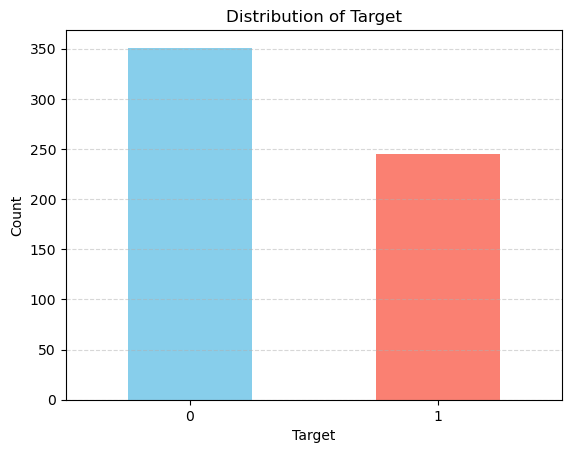

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Bar chart of target values
df['c'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target')
plt.xlabel('Target')
plt.ylabel('Count')
plt.xticks( [0, 1],['0', '1'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
df['cholestoral '].value_counts()

In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age (age in year),596.0,51.186242,9.081547,28.000000,44.0,52.0,58.00,77.000000
sex,596.0,0.703020,0.457311,0.000000,0.0,1.0,1.00,1.000000
chest pain,596.0,3.073826,0.965586,1.000000,2.0,3.0,4.00,4.000000
blood pressure,596.0,132.095337,17.340215,92.000000,120.0,130.0,140.00,184.940631
cholestoral,596.0,247.534959,54.112561,85.000000,211.0,245.0,276.25,428.009466
blood sugar,596.0,0.109060,0.311977,0.000000,0.0,0.0,0.00,1.000000
electrocardiographic,596.0,0.610738,0.869358,0.000000,0.0,0.0,2.00,2.000000
heart rate,596.0,144.433781,23.775124,73.073531,128.0,146.0,162.00,202.000000
exercise induced,596.0,0.315436,0.465080,0.000000,0.0,0.0,1.00,1.000000
depression,596.0,0.808423,1.033474,0.000000,0.0,0.2,1.50,4.020061


/var/folders/8v/j04s7d697pbchpncxsv_q5zw0000gn/T/ipykernel_2181/3486994740.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.kdeplot(data=df, x=column, hue="c", multiple="stack")


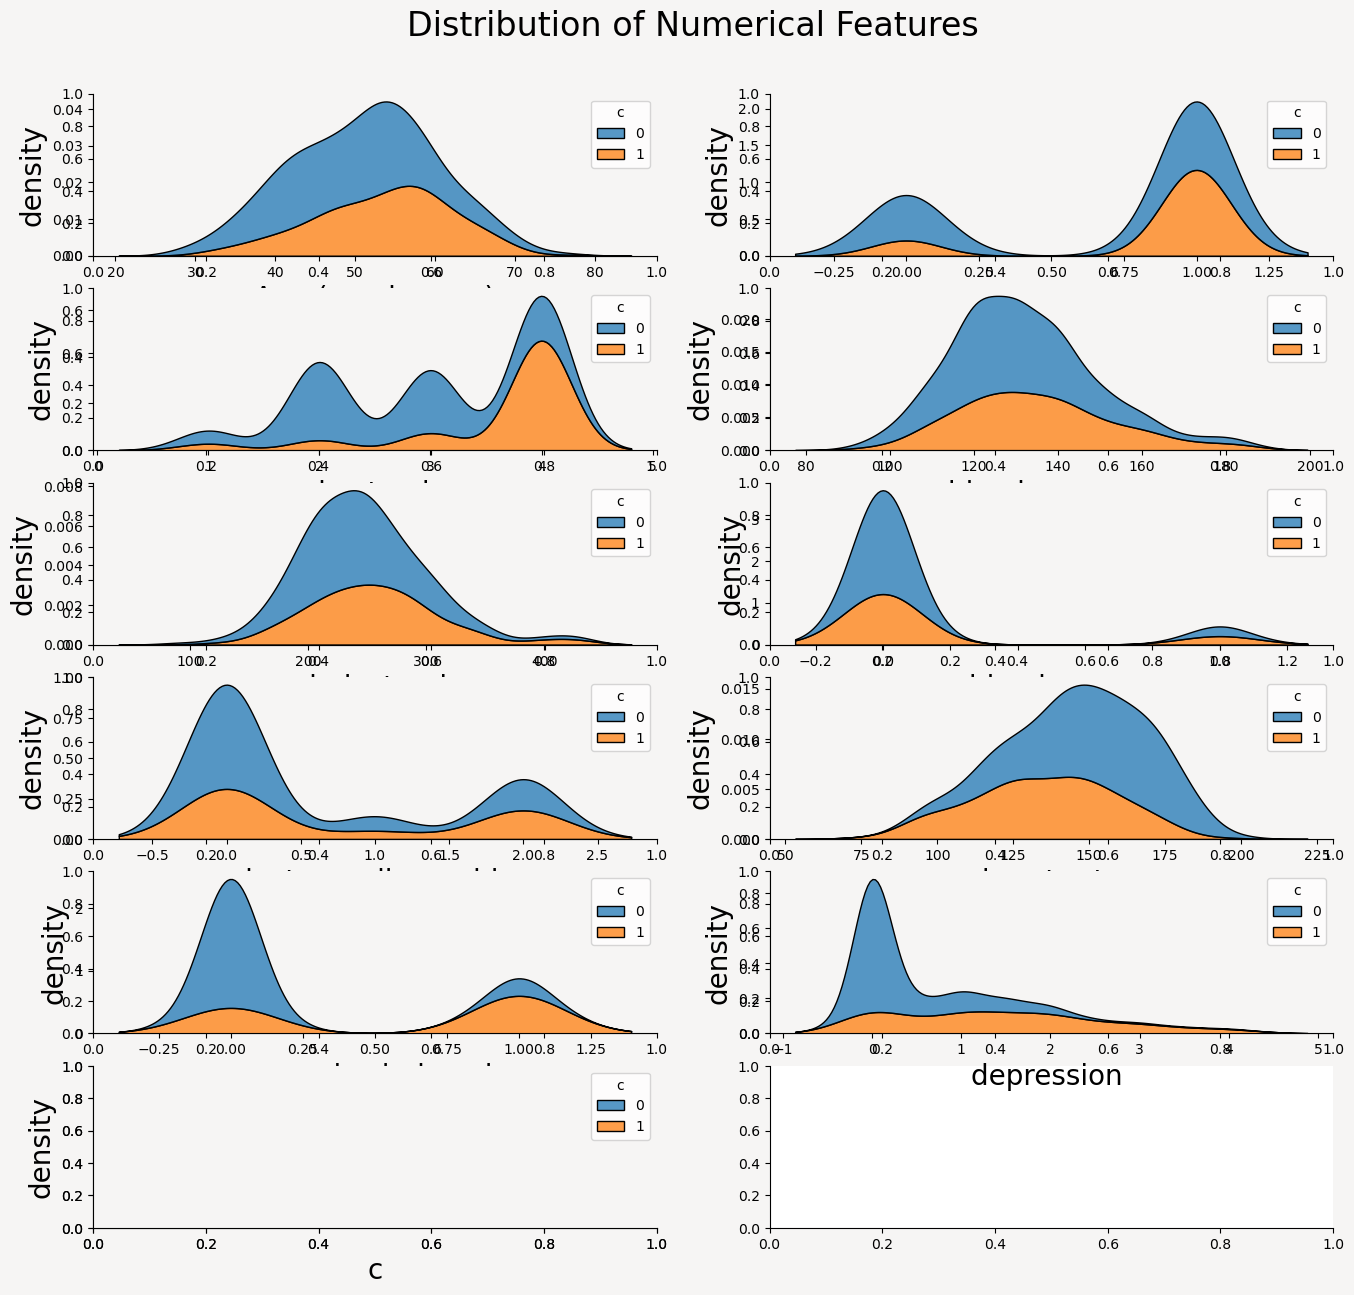

In [199]:
L = len(df.columns)
ncol = 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize = (16, 14), facecolor='#F6F5F4')
fig.subplots_adjust(top=0.92)

i  =1 
for column in df.columns:
    plt.subplot(nrow, ncol, i, facecolor = '#F6F5F4')

    ax = sns.kdeplot(data=df, x=column, hue="c", multiple="stack") 
    ax.set_xlabel(column, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sns.despine(right=True)
    sns.despine(offset=0, trim=False)
     
    i = i +1
    
plt.suptitle('Distribution of Numerical Features' ,fontsize = 24);

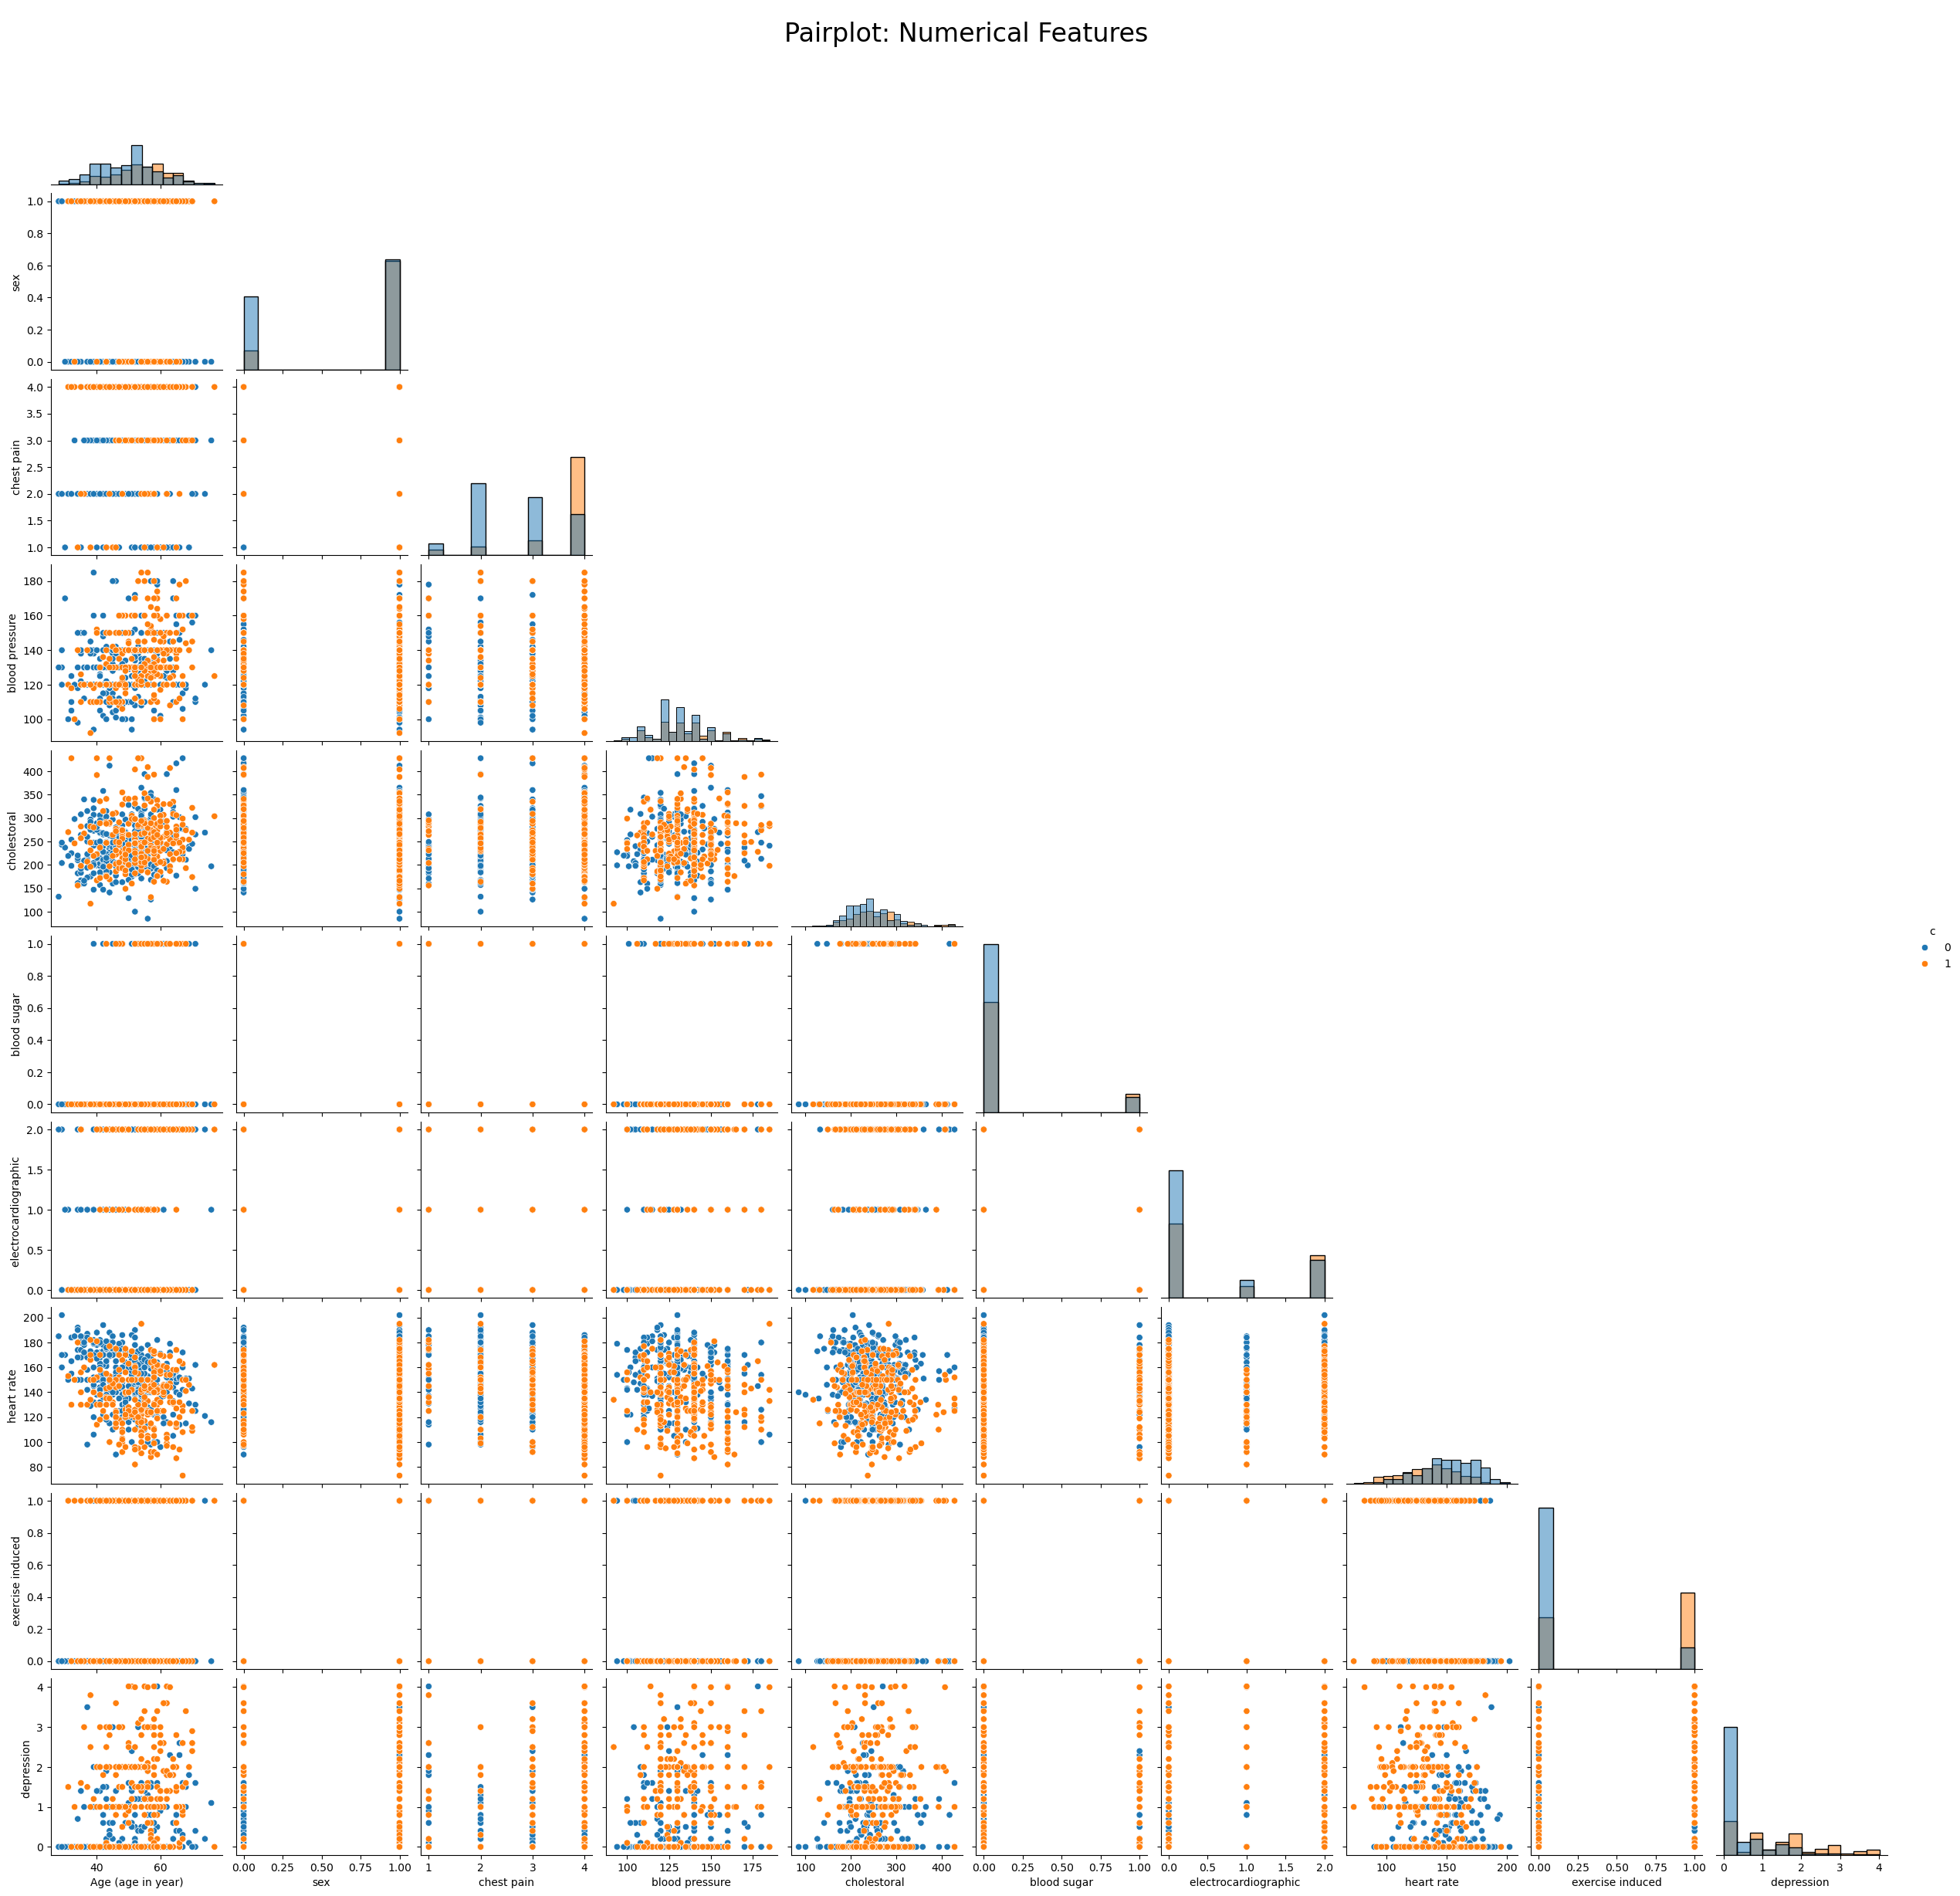

In [203]:
g = sns.pairplot(df, hue="c", corner=True, diag_kind='hist');
plt.suptitle('Pairplot: Numerical Features ' ,fontsize = 24);

<Axes: xlabel='blood pressure', ylabel='chest pain'>

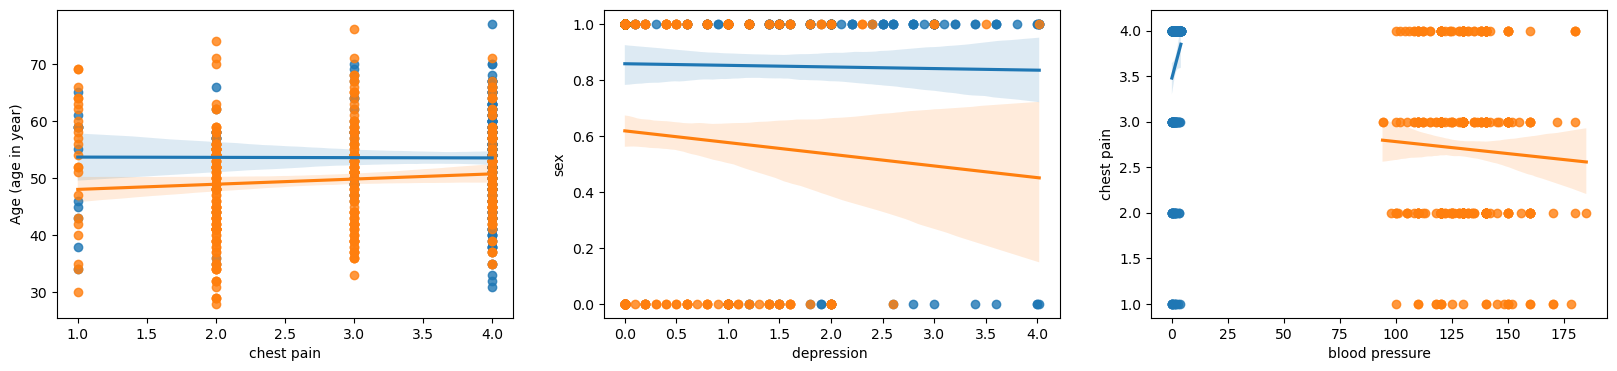

In [215]:

fig, ax = plt.subplots(1,3, figsize=(20, 4))
sns.regplot(data=df[df['c'] ==1], x='chest pain', y='Age (age in year)', ax = ax[0], label='1')
sns.regplot(data=df[df['c'] ==0], x='chest pain', y='Age (age in year)', ax = ax[0], label='0')
sns.regplot(data = df[df['c'] == 1], x = 'depression ', y = 'sex', ax = ax[1], label = '1'  )
sns.regplot(data = df[df['c'] == 0], x = 'depression ', y = 'sex', ax = ax[1], label = '0'  )
sns.regplot(data = df[df['c'] == 1], x = 'depression ', y = 'chest pain', ax = ax[2], label = '1'  )
sns.regplot(data = df[df['c'] == 0], x = 'blood pressure', y = 'chest pain', ax = ax[2], label = '0'  )

<h3>Correlation</h3>